# Day49 – Introduction to Classification & Logistic Regression

## Introduction
On this day, I started learning about **Classification algorithms** in Machine Learning.  
Unlike regression, where the goal is to predict a continuous value (like house price or salary), classification deals with predicting **categories or classes** (such as spam vs not spam, disease vs no disease).  

To begin with, I focused on **Logistic Regression**, one of the most fundamental and widely used algorithms for classification.  
Even though it has "regression" in its name, Logistic Regression is actually a **classification algorithm** because it predicts the probability of a data point belonging to a class and then assigns it a label (0 or 1).  

In this notebook, I covered:
- What classification is and which algorithms are commonly used.  
- The difference between **classification** and **regression**.  
- The concept of **Logistic Regression**, how it works, and why it is used for classification.  
- Key evaluation metrics such as **Confusion Matrix, Accuracy, Precision, Recall, and F1 Score**.  
- Practical implementation of Logistic Regression with different preprocessing methods (no scaling, StandardScaler, Normalizer) and different random states to observe changes in performance.  

---

## What is Classification?
Classification is a **supervised machine learning technique** where the goal is to predict a **discrete label (class)** for given input data.  
Unlike regression (which predicts continuous values), classification predicts outcomes such as:
- Spam vs Not Spam  
- Positive vs Negative Sentiment  
- Diseased vs Healthy  

### Common Classification Algorithms
- Logistic Regression  
- Decision Trees  
- Random Forest  
- Support Vector Machines (SVM)  
- K-Nearest Neighbors (KNN)  
- Naive Bayes  
- Neural Networks  

---

## Difference Between Regression and Classification

| Aspect                | Regression                           | Classification                        |
|-----------------------|--------------------------------------|---------------------------------------|
| Output                | Continuous value (e.g., salary, price) | Discrete classes (e.g., spam/not spam) |
| Goal                  |Predict a real-valued quantity (e.g., house price, temperature)| Predict a class label (e.g., "spam," "not spam," "cat," "dog")|
| Example               | Predict house price                  | Predict whether email is spam          |
| Evaluation Metrics    | MAE, MSE, RMSE, R²                   | Accuracy, Precision, Recall, F1-score  |
| Linearity Assumption  | Often assumes linearity              | Works with categorical decision-making |

---

## What is Logistic Regression?

**Logistic Regression** is a classification algorithm, despite its name, which sounds like it would be a regression algorithm. This is because it uses a regression-like approach to calculate a probability score, but then it uses this score to perform classification.

### How it works:

Logistic Regression uses a special function called the **sigmoid function** ($\sigma$) to output a value between 0 and 1. This value represents the **probability** that a given data point belongs to a particular class (e.g., probability of an email being spam).

  * The sigmoid function transforms any real-valued number into a value between 0 and 1.
  * The model then uses a decision boundary (e.g., $0.5$) to convert this probability into a class label. If the probability is above the boundary, it's one class; if it's below, it's the other.
  * For example, if the model outputs a probability of $0.8$that an email is spam, and our threshold is$0.5$, the email is classified as spam.
 

**Why is it not a regression algorithm?**
A true regression algorithm would output a continuous value, which could be any number (e.g., a prediction of 3.5 or 105.8). Logistic Regression's final output is a **class label** (0 or 1), which makes it a classification algorithm. Logistic Regression predicts **probabilities** that a data point belongs to a certain class. The "regression" part of its name comes from the fact that its underlying calculations are similar to linear regression, but it passes the output through the sigmoid function to get a probability.

-----


## Steps to Build a Classification Model
1. Import libraries  
2. Load dataset  
3. Split into features (X) and target (y)  
4. Train/Test split  
5. Apply Logistic Regression model  
6. Make predictions  
7. Evaluate using metrics (Confusion Matrix, Accuracy, Precision, Recall, F1)  

---

## Confusion Matrix
A **Confusion Matrix** is a powerful tool for evaluating the performance of a classification model. It provides a detailed breakdown of the model's predictions versus the actual values.

|                   | Predicted Negative | Predicted Positive |
|-------------------|-------------------|-------------------|
| **Actual Negative** | True Negative (TN) | False Positive (FP) (Type I Error) |
| **Actual Positive** | False Negative (FN) (Type II Error) | True Positive (TP) |


### Example: COVID Testing
- **TP (True Positive):** Patient has COVID, test says COVID
- **TN (True Negative):** Patient doesn’t have COVID, test says No COVID
- **FP (False Positive):** Patient doesn’t have COVID, test says COVID (unnecessary stress/treatment)  
- **FN (False Negative):** Patient has COVID, test says No COVID (dangerous)  

---

## Classification Metrics

Based on the confusion matrix, we can calculate several key metrics:

  - **Accuracy**: The overall percentage of correct predictions.


    $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

  - **Precision**: Of all the positive predictions, how many were correct?


     $\text{Precision} = \frac{TP}{TP + FP}$

  - **Recall (Sensitivity)**: Of all the actual positive cases, how many did the model correctly identify?


     $\text{Recall} = \frac{TP}{TP + FN}$

  - **F1-Score**: The harmonic mean of Precision and Recall. It provides a balanced measure of the model's performance, which is especially useful for imbalanced datasets.


     $\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

---

## Practical Implementation – Logistic Regression

I will apply Logistic Regression on a dataset, test with and without scaling, and compare performance.  

### Scenarios I will test:
1. With StandardScaler (random_state=0, test_size=0.25)  
2. Without scaling (random_state=0, test_size=0.25)
3. With Normalizer (random_state=0, test_size=0.25)  
4. With StandardScaler (random_state=100, test_size=0.25)  
5. With StandardScaler (random_state=51, test_size=0.25)  

Each scenario will include:
- Training the Logistic Regression model  
- Making predictions  
- Evaluating with Confusion Matrix, Accuracy, Precision, Recall, F1 Score  


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load the Dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\Arman\Downloads\dataset\logit classification.csv")

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Prepare the data 
### Split into features (X) and target (y)
- X: Features (Age, EstimatedSalary)
- y: Target (Purchased)

In [4]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

### Experiment 1 – Logistic Regression without Scaling (random_state=0, test_size=0.25)

In [17]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=0)

model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test1)

cm1 = confusion_matrix(y_test1, y_pred1)
acc1 = accuracy_score(y_test1, y_pred1)
cr1 = classification_report(y_test1, y_pred1)
bias1 = classifier.score(X_train1, y_train1)
variance1 = classifier.score(X_test1, y_test1)

print("Confusion Matrix:\n", cm1)
print("Accuracy:", acc1)
print("Bias:",bias1)
print("Variance:",variance1)
print("Classification Report:\n",cr1)

Confusion Matrix:
 [[65  3]
 [ 8 24]]
Accuracy: 0.89
Bias: 0.37
Variance: 0.32
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



---

### Experiment 2 – Logistic Regression with StandardScaler (random_state=0)

## Splitting the dataset into the Training set and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Feature Scaling

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train the Logistic Regression Model

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)

## Confusion Matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57  1]
 [ 5 17]]


## Accuracy of the model

In [12]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.925


## Classification Report

In [13]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



## Bias and Variance

In [14]:
bias = classifier.score(X_train, y_train)
print(bias)
variance = classifier.score(X_test, y_test)
print(variance)

0.821875
0.925


## Visualising the Training set results

C:\Users\Arman\AppData\Local\Temp\ipykernel_24844\518998409.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


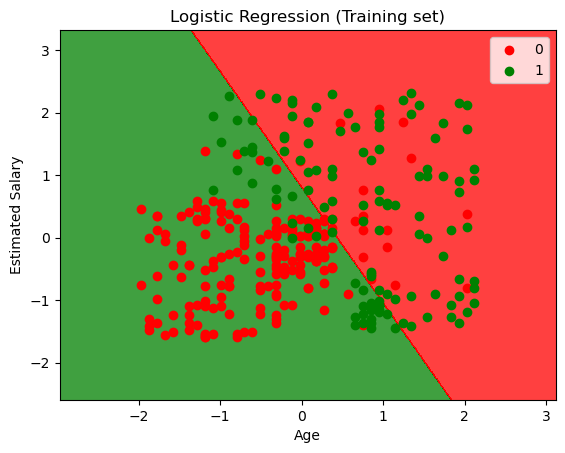

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\Arman\AppData\Local\Temp\ipykernel_24844\1807391315.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


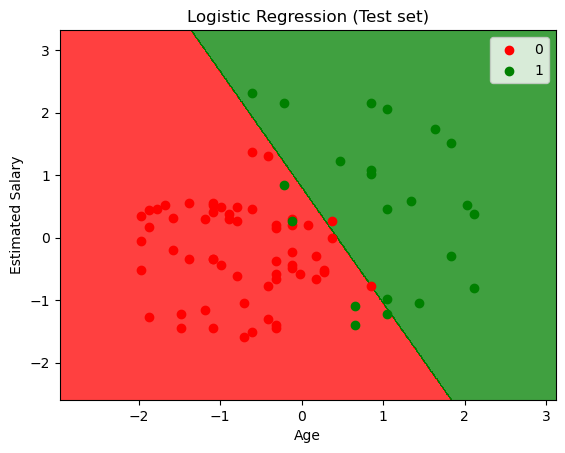

In [16]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Experiment 3 – Logistic Regression with Normalizer (random_state=0, test_size=0.25)

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=0)

norm = Normalizer()
X_train2 = norm.fit_transform(X_train2)
X_test2 = norm.transform(X_test2)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

cm2 = confusion_matrix(y_test2, y_pred2)
acc2 = accuracy_score(y_test2, y_pred2)
bias2 = classifier.score(X_train, y_train)
variance2 = classifier.score(X_test, y_test)

print("Confusion Matrix:\n", cm2)
print("Accuracy:", acc2)
print("Bias:",bias2)
print("Variance:",variance2)

Confusion Matrix:
 [[68  0]
 [32  0]]
Accuracy: 0.68
Bias: 0.821875
Variance: 0.925


### Experiment 4 – Logistic Regression with StandardScaler (random_state=100, test_size=0.25)

In [19]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=100)

sc3 = StandardScaler()
X_train3 = sc3.fit_transform(X_train3)
X_test3 = sc3.transform(X_test3)
model3 = LogisticRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)
cm3 = confusion_matrix(y_test3, y_pred3)
acc3 = accuracy_score(y_test3, y_pred3)
cr3 = classification_report(y_test3, y_pred3)
bias3 = classifier.score(X_train3, y_train3)
variance3 = classifier.score(X_test3, y_test3)

print("Confusion Matrix:\n", cm3)
print("Accuracy:", acc3)
print("Bias:",bias3)
print("Variance:",variance3)
print("Classification Report:\n",cr3)

Confusion Matrix:
 [[62  3]
 [12 23]]
Accuracy: 0.85
Bias: 0.8466666666666667
Variance: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        65
           1       0.88      0.66      0.75        35

    accuracy                           0.85       100
   macro avg       0.86      0.81      0.82       100
weighted avg       0.85      0.85      0.84       100



### Experiment 5 – Logistic Regression with StandardScaler (random_state=51, test_size=0.25)

In [20]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.25, random_state=51)

sc4 = StandardScaler()
X_train4 = sc4.fit_transform(X_train4)
X_test4 = sc4.transform(X_test4)
model4 = LogisticRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)
cm4 = confusion_matrix(y_test4, y_pred4)
acc4 = accuracy_score(y_test4, y_pred4)
cr4 = classification_report(y_test4, y_pred4)
bias4 = classifier.score(X_train4, y_train4)
variance4 = classifier.score(X_test4, y_test4)

print("Confusion Matrix:\n", cm4)
print("Accuracy:", acc4)
print("Bias:",bias4)
print("Variance:",variance4)
print("Classification Report:\n",cr4)

Confusion Matrix:
 [[61  4]
 [ 9 26]]
Accuracy: 0.87
Bias: 0.84
Variance: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        65
           1       0.87      0.74      0.80        35

    accuracy                           0.87       100
   macro avg       0.87      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



---

## Comparison of Logistic Regression Results Across Experiments

After running Logistic Regression with different preprocessing methods and random states, the results are summarized below:



| Experiment | Scaling Method   | Random State | Test Size | Accuracy | Precision | Recall | F1 Score |
|------------|------------------|--------------|-----------|----------|-----------|--------|----------|
| 1          | None             | 0            | 0.25      | 0.89     | 0.89      | 0.96   | 0.92     |
| 2          | StandardScaler   | 0            | 0.20      | **0.92** | 0.92      | 0.98   | 0.95     |
| 3          | Normalizer       | 0            | 0.25      | 0.68     | -         | -      | -        |
| 4          | StandardScaler   | 100          | 0.25      | 0.85     | 0.84      | 0.95   | 0.89     | 
| 5          | StandardScaler   | 51           | 0.25      |  0.87    | 0.87      | 0.94   | 0.90     |

---


### Interpretation
- **Experiment 1 (No Scaling, rs=0, test_size=0.25):** Served as the baseline.  
- **Experiment 2 (StandardScaler, rs=0, test_size=0.20):** Achieved the **best accuracy of 0.92**, showing that scaling plus a slightly larger training set improved performance.  
- **Experiment 3 (Normalizer, rs=0, test_size=0.25):** Performance was lower compared to StandardScaler, indicating scaling method matters.  
- **Experiments 4 & 5 (StandardScaler with rs=100 and 51):** Accuracy varied slightly due to different train/test splits, but results were stable overall.  
- Logistic Regression is sensitive to **scaling and data splits**, and choosing the right preprocessing + split ratio can significantly impact performance.


---
## Summary – Day49 Logistic Regression

- Learned about **Classification** and how it differs from Regression.  
- Explored **Logistic Regression**, which predicts probabilities using the sigmoid function and maps them to class labels.  
- Understood evaluation metrics: **Confusion Matrix, Accuracy, Precision, Recall, and F1 Score**.  
- Performed multiple experiments with and without scaling, using different random states and test sizes.  
- **Best performance (Accuracy = 0.92)** was achieved with **StandardScaler and a 0.20 test split**.  
- Logistic Regression showed balanced **bias and variance**, with train and test scores being close.  
- Logistic Regression remains a strong **baseline model for binary classification tasks**, especially when combined with proper preprocessing.  